# Discretización aproximada de sistemas.

Dado un modelo $G(s)$ como función de transferencia en dominio $s$, se desea encontrar un modelo equivalente $G(z)$ en dominio $z$.

$$G(s)=\frac{10}{s^2 + 4s + 10}$$

- Analice la función de transferencia $G(s)$

- Su análisis
    - Orden 2
    - No tiene ceros
    - Polos en las raíces de $s^2+4s+10$:
    $$s^2+4s+10 = 0$$

Forma 

$$as^2+bs+c=0$$

$$s_{1,2}=\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

$a=1$, $b=4$ y $c=10$

$$s_{1,2}=\frac{-4 \pm \sqrt{16 - 40}}{2}$$
$$s_{1,2}=\frac{-4 \pm \sqrt{40 - 16}\sqrt{-1}}{2}$$
$$s_{1,2}=\frac{-4 \pm \sqrt{4\cdot 10 - 4\cdot 4}j}{2}$$
$$s_{1,2}=\frac{-4 \pm 2\sqrt{10 - 4}j}{2}$$
$$s_{1,2}=\frac{-4 \pm 2\sqrt{6}j}{2}$$

$$s_{1,2}=-2 \pm \sqrt{6}j$$

$$amortiguamiento = \frac{R(polo)}{\sqrt{R(polo)^2 + I(polo)^2}}$$

0.6324555320336759


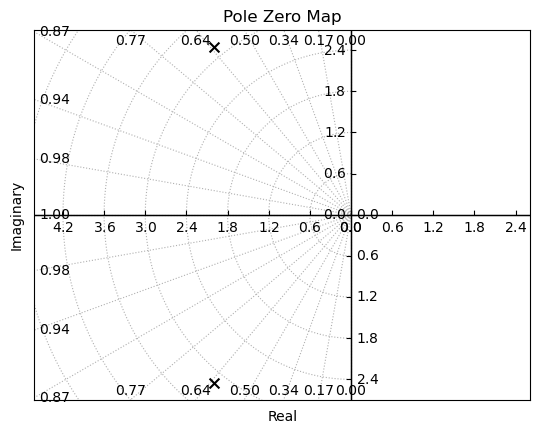

In [5]:
# Su código
import control
import numpy as np
G = control.tf([10],[1,4,10])
control.pzmap(G,grid='on');
amort = 2/np.sqrt(4+6)
print(amort)

Respuesta al escalón

$$Y(s)=\frac{1}{s}G(s) = \frac{1}{s}\frac{10}{s^2 + 4s + 10}$$

$$y(t) = \mathcal{L}^{-1} \left \{    \frac{1}{s}\frac{10}{s^2 + 4s + 10} \right \}$$

¡Por supuesto! Para descomponer en fracciones parciales la expresión $\frac{1}{s}\frac{10}{s^2 + 4s + 10}$, debemos seguir los siguientes pasos:

1. Factorizamos el denominador $s^2 + 4s + 10$ utilizando la fórmula general o completando el cuadrado. En este caso, podemos utilizar la fórmula general:

   La fórmula general para resolver una ecuación cuadrática $ax^2 + bx + c = 0$ es:

   $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

   En nuestro caso, $a = 1$, $b = 4$ y $c = 10$. Sustituyendo estos valores en la fórmula general, obtenemos:

   $s^2 + 4s + 10 = 0$

   $s = \frac{-4 \pm \sqrt{4^2 - 4(1)(10)}}{2(1)}$

   $s = \frac{-4 \pm \sqrt{16 - 40}}{2}$

   $s = \frac{-4 \pm \sqrt{-24}}{2}$

   $s = \frac{-4 \pm 2i\sqrt{6}}{2}$

   Simplificando la expresión:

   $s = -2 \pm i\sqrt{6}$

   Por lo tanto, los factores del denominador son $(s + 2 - i\sqrt{6})$ y $(s + 2 + i\sqrt{6})$.

2. Ahora que tenemos los factores del denominador, podemos expresar la fracción original en fracciones parciales de la siguiente manera:

   $$\frac{1}{s}\frac{10}{s^2 + 4s + 10} = \frac{A}{s} + \frac{Bs + C}{s^2 + 4s + 10}$$

   Donde $A$, $B$ y $C$ son constantes que debemos determinar.


$$\frac{1}{s}\frac{10}{s^2 + 4s + 10} =  \frac{As^2 + 4As + 10A + Bs^2 + Cs}{s(s^2 + 4s +10)}$$

$$\frac{1}{s}\frac{10}{s^2 + 4s + 10} =  \frac{(A+B)s^2 + (4A+C)s + 10A}{s(s^2 + 4s +10)}$$

$$A=1$$
$$B=-1$$
$$C=-4$$

$$\frac{1}{s}\frac{10}{s^2 + 4s + 10} = \frac{1}{s} + \frac{-s -4}{s^2 + 4s + 10}$$
$$\frac{1}{s}\frac{10}{s^2 + 4s + 10} = \frac{1}{s} - \frac{s +4}{s^2 + 4s + 10}$$

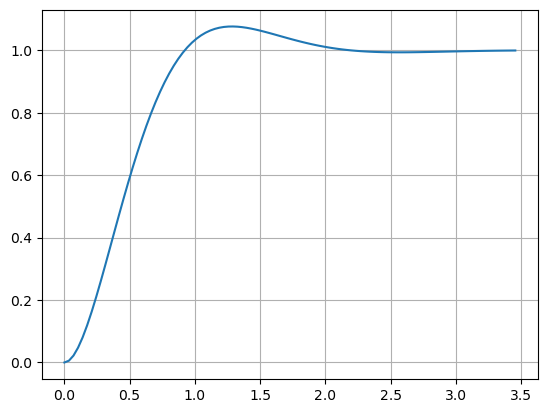

In [4]:
t,y = control.step_response(G)
import matplotlib.pyplot as plt
plt.plot(t,y)
plt.grid()

$$\omega = 2 \pi f = \frac{2 \pi}{T}$$

$$T = \frac{2 \pi}{\omega}$$

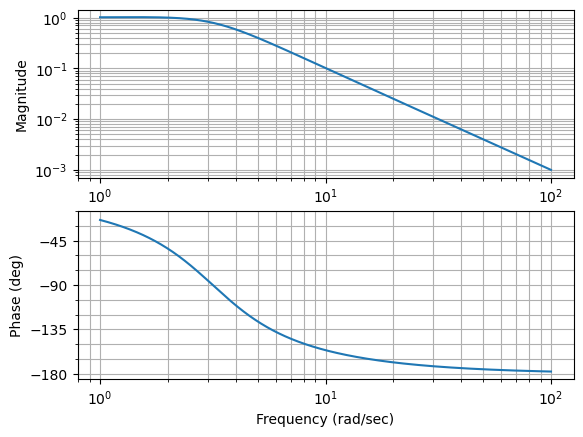

In [6]:
control.bode_plot(G);

- Cuál es un periodo de muestro $T_s$ apropiado?

$$T_s \le \frac{2 \pi}{60}=0.10462$$
$$T_s=0.1$$

- Su análisis

In [1]:
# Su código


Con anterioridad se ha encontrado una relación entre la transformada de Laplace y la transformada z de una señal muestrada. La representación frecuencial de la señal muestreada $X_\text{s}(s)$ es equivalente a la transformada $z$  de la señal discreta $X(z)$ con $z = e^{s T}$.

- Encuentre una función de transferencia G(z) a partir del mapeo de polos y ceros de $G(s)$. Es decir, las raíces de $G(z)$ deben cumplir con la ubicación mapada de las raíces de $G(s)$ mediante $z = e^{s T}$.

- Su análisis

In [1]:
# Su código


También se ha encontrado una relación entre la transformada de Laplace y la transformada z mediante una aproximación de la derivada como diferencias hacia atrás.

$$\frac{dy}{dt} \sim \frac{y[k] - y[k-1]}{T_s}$$
$$sY(s) \sim \frac{Y(z) - Y(z)z^{-1}}{T_s} = \frac{1 - z^{-1}}{T_s}Y(z)$$
$$s \sim \frac{1 - z^{-1}}{T_s}$$

- Encuentre una función de transferencia G(z) a partir del mapeo de polos y ceros de $G(s)$. Es decir, las raíces de $G(z)$ deben cumplir con la ubicación mapada de las raíces de $G(s)$ mediante $s=\frac{1 - z^{-1}}{T_s}$.

- Su análisis

In [1]:
# Su código


Los sistemas de tiempo discreto interactúan con los sistemas de tiempo continuo mediante retenedores.

![https://slideplayer.com/slide/4046828/13/images/2/3.1+Zero-order-hold+%28ZOH%29.jpg](https://slideplayer.com/slide/4046828/13/images/2/3.1+Zero-order-hold+%28ZOH%29.jpg)

El sistema ZoH recibe una señal en tiempo discreto y entrega una señal de tiempo continuo.

Su respuesta impulsional es un pulso de duración $T_s$.


Su respuesta impulsional es una señal pulso de duración $T_s$.

$$G_{zoh}(s) = \frac{1-e^{-sT_s}}{s}$$

![https://www.researchgate.net/profile/Ronald-Rios-Hernandez/publication/337317425/figure/fig3/AS:826272267649026@1574010068586/Figura-4-Retenedor-de-orden-cero.ppm](https://www.researchgate.net/profile/Ronald-Rios-Hernandez/publication/337317425/figure/fig3/AS:826272267649026@1574010068586/Figura-4-Retenedor-de-orden-cero.ppm)

Observe que conecta en serie en retenedor $G_{zoh}(s)$ y el sistema $G(s)$. Por lo cuál resulta coherente transformar $G_{zoh}(s)G(s)$

$$G(z) = \left (1-z^{-1} \right ) \mathcal{z} \left \{ \frac{G(s)}{s} \right \}$$

- Encuentre una función de transferencia $G(z)$ a partir del mapeo de polos y ceros de $G_{zoh}(s)G(s)$. Es decir, las raíces en $z$ deben cumplir con la ubicación mapa de las raíces de mediante $z = e^{s T}$.

- Su análisis

In [1]:
# Su código
